# Fake News Detection Using Machine Learning


# Introduction

Fake news is when people lie or make mistakes on the internet. Fake news can make people confused or angry. Technology is getting better and brighter. It can help us find out what is fake and what is real.  We can use to make your own Fake news detection system using machine learning.



# Objective:

The objective is We have to find out what is fake and what is real. We can use an intelligent system that can read a text (like a tweet, a news article, or a message) and tell us how likely it is to be fake or real.

# Import required libraries

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score, classification_report

# Load both datasets

In [2]:
# Load true news dataset
true_df = pd.read_csv('True.csv')
true_df['label'] = 0  # Add a label column for true news

# Load fake news dataset
fake_df = pd.read_csv('Fake.csv')
fake_df['label'] = 1  # Add a label column for fake news

In [3]:
true_df .head(2)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0


In [4]:
fake_df.head(2)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1


# Combine both datasets

In [5]:
# Combine the datasets
df = pd.concat([true_df, fake_df], ignore_index=True)

In [6]:
df.sample(5)

,title,text,subject,date,label
38743,NYC MAYOR DEBLASIO SAYS ‘Something is changing...,Why would anyone expect anything else from a m...,Government News,"May 18, 2015",1
40910,LIVE FEED: Trump “Thank You” Tour In NC With R...,,left-news,"Dec 6, 2016",1
12729,"World powers push Saudis, Iran to stop interfe...",PARIS (Reuters) - World powers attempted to sh...,worldnews,"December 8, 2017",0
2945,Trump administration reverses policy on fiancé...,WASHINGTON/NEW YORK (Reuters) - U.S. President...,politicsNews,"June 29, 2017",0
702,U.S. Senator Flake concerned about tax plan im...,WASHINGTON (Reuters) - U.S. Republican Senator...,politicsNews,"November 9, 2017",0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


* There are no missing va;ues in the daatset.
* There are one integer columns and all are object columns.

In [8]:
# Shape of the daatset
df.shape

(44898, 5)

# Data Analysis

In [9]:
df.nunique()

title      38729
text       38646
subject        8
date        2397
label          2
dtype: int64

Analyzing Label Column

In [10]:
# Label Wise Analysis
abel=df["label"].value_counts().index
values=df["label"].value_counts().values
plt.pie(values,labels=label,autopct="%1.2f%%")
plt.title("Label Wise Analysis")
plt.show()

NameError: name 'label' is not defined

* There are 48 per cent news that is truth.
* There are 52 per cent fake news.

Subect Wise Analysis

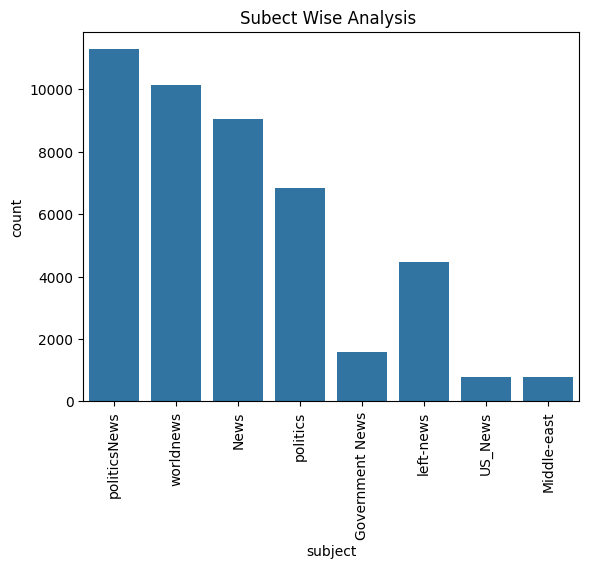

In [ ]:
sns.countplot(x="subject",data=df)
plt.xticks(rotation="vertical")
plt.title("Subect Wise Analysis ")
plt.show()

In [ ]:
df["subject"].value_counts(normalize=True)

subject
politicsNews       0.251058
worldnews          0.225957
News               0.201568
politics           0.152368
left-news          0.099314
Government News    0.034968
US_News            0.017440
Middle-east        0.017328
Name: proportion, dtype: float64

* There are highest news in the subject of Political News
* Middle East and US News subject have least news.

Subject and Labels wise Distribution

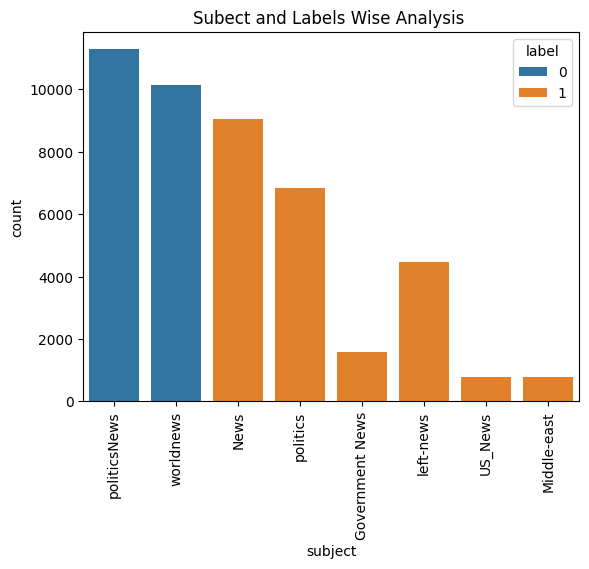

In [ ]:
sns.countplot(x="subject",data=df,hue="label")
plt.xticks(rotation="vertical")
plt.title("Subect and Labels Wise Analysis ")
plt.show()

In [ ]:
pd.crosstab(columns = df.label ,  index= df.subject ,normalize=True)

label,0,1
subject,,
Government News,0.000000,0.034968
Middle-east,0.000000,0.017328
News,0.000000,0.201568
US_News,0.000000,0.017440
left-news,0.000000,0.099314
politics,0.000000,0.152368
politicsNews,0.251058,0.000000
worldnews,0.225957,0.000000


* Political News, World News have the real News.
* Apart from Political News, World News rest all of the subject news is fake.

In [ ]:
df["title"].unique()

array(['As U.S. budget fight looms, Republicans flip their fiscal script',
       'U.S. military to accept transgender recruits on Monday: Pentagon',
       "Senior U.S. Republican senator: 'Let Mr. Mueller do his job'",
       ...,
       'BOILER ROOM – No Surrender, No Retreat, Heads Will Roll  – EP #38',
       'Federal Showdown Looms in Oregon After BLM Abuse of Local Ranching Family – Bundys Lead Protest',
       'A Troubled King: Chicago’s Rahm Emanuel Desperate to Save His 2020 Presidential Run'],
      dtype=object)

In [ ]:
df["text"].unique()

array(['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support

# Train Test Split

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
X_train.head()

36335    This story is from 2006 and is the first in a ...
12384    PARIS (Reuters) - The leaders of the European ...
24419    Star Wars icon Mark Hamill previously mocked D...
24740    The whiner-in-chief struck again with yet anot...
27039    Donald Trump doesn t have much foreign policy ...
Name: text, dtype: object

In [ ]:
y_train.head()

36335    1
12384    0
24419    1
24740    1
27039    1
Name: label, dtype: int64

# Train the Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

# Model Prediction

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

# Model Evaluation

In [ ]:
#  Make predictions and Evaluate the model
# Display the result
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_result)

Accuracy: 0.9387527839643652
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      4330
           1       0.93      0.95      0.94      4650

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



# User Input
By adding this step we can give input of our choice give input from the list of datasets it will tell if the news is fake or true

In [ ]:
# Take input from the user
user_input = input("Enter a news article: ")

# Make a prediction
prediction = model.predict([user_input])

# Display the result
if prediction[0] == 0:
    print("The news is likely to be true.")
else:
    print("The news is likely to be fake.")